# E is for Exploratory Data Analysis
> What is Exploratory Data Analysis (EDA), why is it done, and how do we do it in Python?

- toc: false 
- badges: True
- comments: true
- categories: []
- sticky_rank: 4
- hide: True

## _What is **Exploratory Data Analysis(EDA)**?_
EDA is the process of getting to know our data primarily through simple visualizations before fitting a model. As Wickham and Grolemund state, EDA is more an attitude than a scripted list of steps which must be carried out{% fn 1 %}.  
## _Why is it done?_
Two main reasons: 

1. If we collected the data ourselves to solve a problem, we need to determine whether our data is sufficient for solving that problem.  

2. If we didn't collect the data ourselves, we need to have a basic understanding of the type, quantity, quality, and possible relationships between the features in our data.

## _How do we do it in Python?_

While I could use a toy data set, like in my [last post](https://educatorsrlearners.github.io/an-a-z-of-machine-learning/algorithm/2020/05/26/d-is-for-decision-tree.html) but after seeing comments like this 

> twitter: https://twitter.com/drob/status/1021233822392881152


I'm feeling inspired to use my own data :grin:

As always, I'll follow the steps outlined in [_Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow_](https://github.com/ageron/handson-ml/blob/master/ml-project-checklist.md)

### Step 1: Frame the Problem
"Given a set of features, can we determine how old someone needs to be to read a book?" 

### Step 2: Get the Data
To answer the question above, I sourced labeled data by scraping [Common Sense Media's Book Reviews](https://www.commonsensemedia.org/book-reviews) using `BeautifulSoup` and then wrote the data to a csv.{% fn 1 %} 

![](../images/e-is-for-eda/csm2.png "Credit: https://www.commonsensemedia.org/book-reviews")  


### Step 3: Explore the Data to Gain Insights (i.e. EDA)
As always, import the basics, then load the data. 

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/educatorsRlearners/book-maturity/master/csv/book_info_complete.csv'

df = pd.read_csv(url)

Time to start asking and answering some basic questions: 

- How much data do we have? 

In [3]:
df.shape

(5816, 24)

OK, so we have 23 features and one target as well as 5,816 observations.

*Why do we have fewer than in the screenshot above?*

Because Common Sense Media is constantly adding new reviews to their website, meaning they've added nearly 100 books to their site since I completed my project at the end of March 2020. 

- What type of data do we have? 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5816 entries, 0 to 5815
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   title                           5816 non-null   object 
 1   description                     5816 non-null   object 
 2   plot                            5816 non-null   object 
 3   csm_review                      5816 non-null   object 
 4   need_to_know                    5816 non-null   object 
 5   par_rating                      2495 non-null   float64
 6   kids_rating                     3026 non-null   float64
 7   csm_rating                      5816 non-null   int64  
 8   Author                          5468 non-null   object 
 9   Genre                           5816 non-null   object 
 10  Topics                          3868 non-null   object 
 11  Book type                       5816 non-null   object 
 12  Publisher                       56

Looks like a mix of strings and floats. 

*Lets look at a sample*

Good idea. 

In [5]:
df.head().T

,0,1,2,3,4
title,The Third Twin,Small Damages,"The School for Good and Evil, Book 1","Agent of Chaos: The X-Files Origins, Book 1",Crossing Ebenezer Creek
description,Gripping thriller skimps on character developm...,Luminous story of pregnant teen's summer in Sp...,Fractured fairy tale has plenty of twists for ...,"Series pictures Mulder as teen, captures essen...",Heartbreaking novel follows freed slaves on Sh...
plot,"Twins Ava and Alexa ""Lexi"" Rios live in an aff...","It's the summer of 1996, which 18-year-old Ken...",When best friends Sophie and Agatha are stolen...,"Set in 1979, AGENT OF CHAOS follows a 17-year-...",CROSSING EBENEZER CREEK is a YA novel from awa...
csm_review,"THE THIRD TWIN has an interesting, compelling ...",This could well have been a minefield of clich...,The School for Good and Evil is no run-of-the-...,Popular TV characters don't always make a smoo...,"Beautifully written and poetically rendered, t..."
need_to_know,Parents need to know that The Third Twin is a ...,Parents need to know that Small Damages is nar...,Parents need to know that The School for Good ...,Parents need to know that Agent of Chaos: The ...,Parents need to know that Crossing Ebenezer Cr...
par_rating,17,NaN,11,NaN,NaN
kids_rating,14,14,11,NaN,NaN
csm_rating,12,14,8,13,13
Author,CJ Omololu,Beth Kephart,Soman Chainani,Kami Garcia,Tonya Bolden
Genre,Mystery,Coming of Age,Fairy Tale,Science Fiction,Historical Fiction


In [5]:
#Author + Authors
5468 + 348

5816

In [6]:
#Publisher + Publisher
5675 + 33

5708

In [7]:
numeric = df.select_dtypes(include='number')
string = df.select_dtypes(exclude='number')

In [8]:
numeric.head()

,par_rating,kids_rating,csm_rating,Number of pages
0,17.0,14.0,12,336.0
1,NaN,14.0,14,304.0
2,11.0,11.0,8,496.0
3,NaN,NaN,13,320.0
4,NaN,NaN,13,240.0


In [10]:
import missingno as msno 

In [1]:
msno.bar(string);

NameError: name 'msno' is not defined

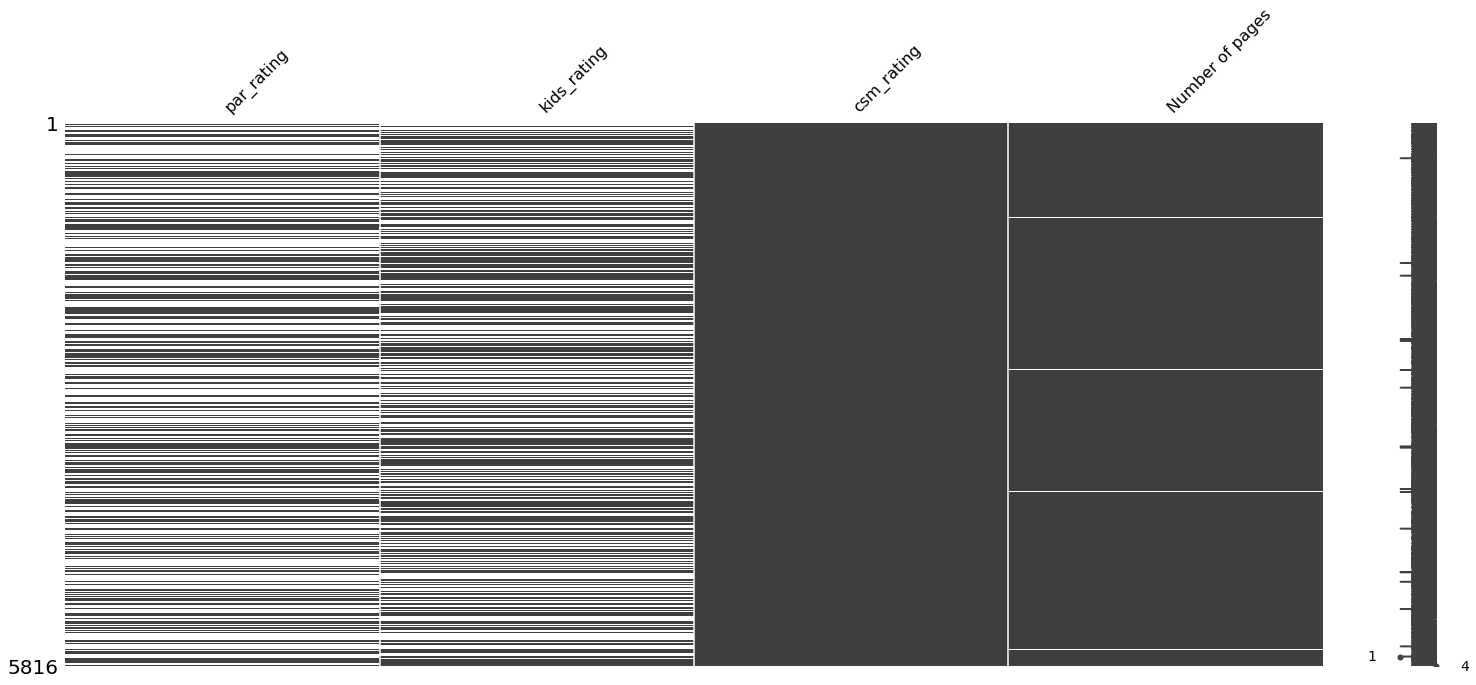

In [12]:
msno.matrix(numeric)

## Summary



### Further Reading


### Footnotes
{{ ['Chapter 7: Exploratory Data Analysis' in *R for Data Science* by Hadley Wickham  & Garrett Grolemund](https://r4ds.had.co.nz/exploratory-data-analysis.html)
 | fndetail: 1 }}  
{{You can find the code [here](https://github.com/educatorsRlearners/book-maturity/blob/master/00_get_search_pages.ipynb) | fndetail: 2 }}  